# Before tuning




```
# This is formatted as code
```

## Matrix comparison


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the exported matrices
xgb = pd.read_csv("b4tuning/xgb_matrix.csv", index_col=0)
rf = pd.read_csv("b4tuning/rf_matrix.csv", index_col=0)
logreg = pd.read_csv("b4tuning/logreg_matrix.csv", index_col=0)
knn = pd.read_csv("b4tuning/knn_matrix.csv", index_col=0)

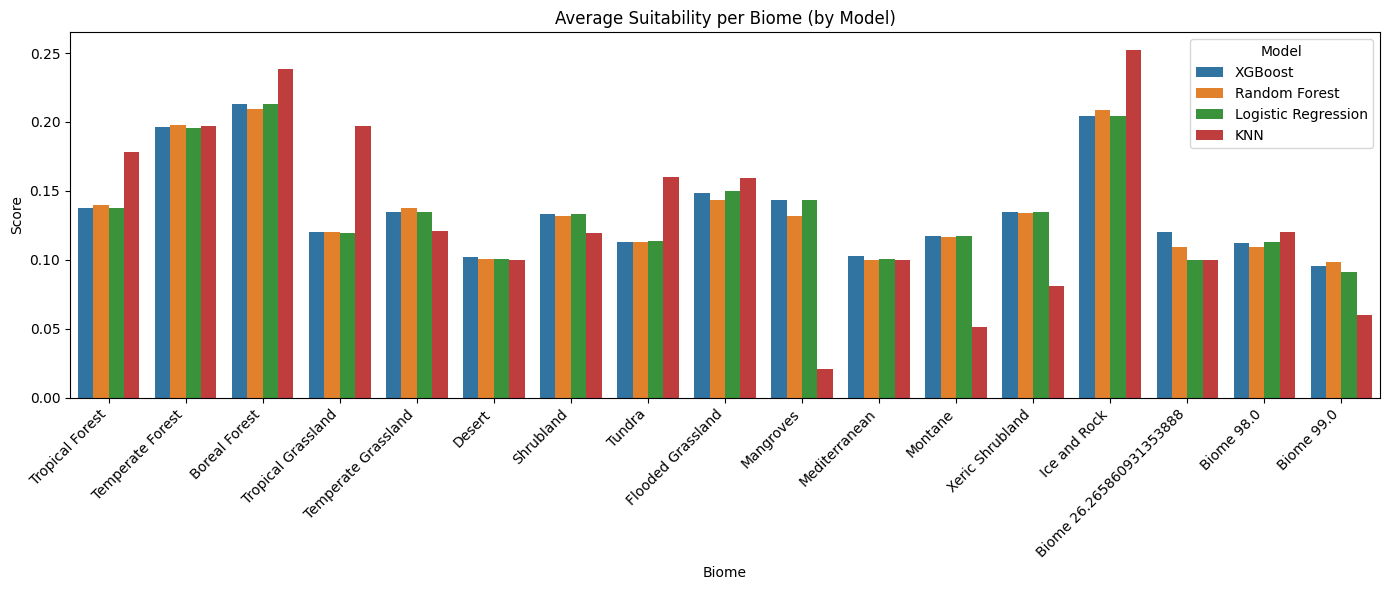

In [ ]:
# Melt and merge for plotting
xgb["Model"] = "XGBoost"
rf["Model"] = "Random Forest"
logreg["Model"] = "Logistic Regression"
knn["Model"] = "KNN"


# Ensure index (species) is reset before melting
for df in [xgb, rf, logreg, knn]:
    df.reset_index(inplace=True)
all_data = pd.concat([xgb, rf, logreg, knn])
all_data = all_data.rename(columns={"index": "Species"})
melted = all_data.melt(id_vars=["Species", "Model"], var_name="Biome", value_name="Score")

# Plot comparison heatmap or barplot
plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x="Biome", y="Score", hue="Model", errorbar=None)
plt.title("Average Suitability per Biome (by Model)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Model
KNN                    0
Logistic Regression    0
Random Forest          0
XGBoost                0
dtype: int64
Model
KNN                    0.247936
Logistic Regression    0.237114
Random Forest          0.237137
XGBoost                0.236068
dtype: float64


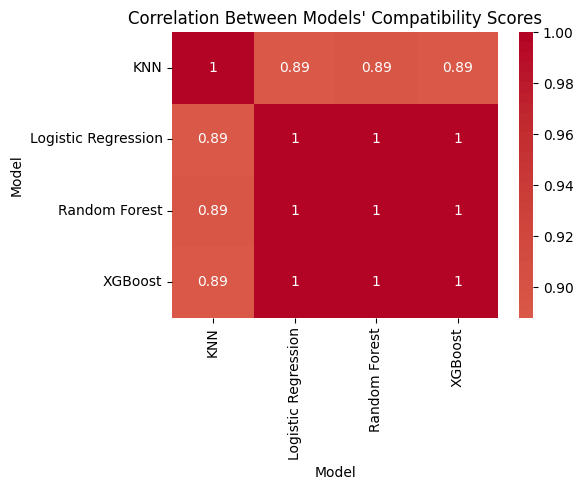

In [ ]:
# Pivot melted data to species-biome-model format
pivoted = melted.pivot_table(index=["Species", "Biome"], columns="Model", values="Score")
correlation = pivoted.dropna().corr()

print(pivoted.isna().sum())

print(pivoted.std())

# Plot correlation between models
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0.5)
plt.title("Correlation Between Models' Compatibility Scores")
plt.tight_layout()
plt.show()

## Metric Comparison

In [ ]:
rf_metrics = pd.read_csv("b4tuning/rf_metrics.csv")
xgb_metrics = pd.read_csv("b4tuning/xgb_metrics.csv")
logreg_metrics = pd.read_csv("b4tuning/logreg_metrics.csv")
knn_metrics = pd.read_csv("b4tuning/knn_metrics.csv")

# Combine
all_metrics = pd.concat([rf_metrics, xgb_metrics, logreg_metrics, knn_metrics])
all_metrics.head()

,Species,Model,Accuracy,Precision,Recall,F1,Unnamed: 0
0,axolotl,Random Forest,0.995455,0.000000,0.000000,0.000000,NaN
1,blue_macaw,Random Forest,0.948182,0.000000,0.000000,0.000000,NaN
2,ocelot,Random Forest,0.785455,0.578947,0.046025,0.085271,NaN
3,black_iguana,Random Forest,0.954545,0.000000,0.000000,0.000000,NaN
4,resplendent_quetzal,Random Forest,0.970909,0.000000,0.000000,0.000000,NaN


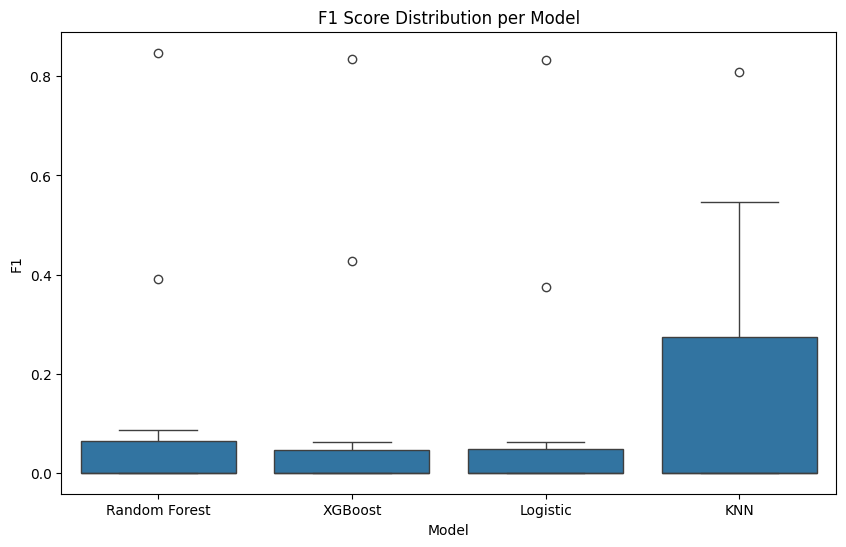

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_metrics, x="Model", y="F1")
plt.title("F1 Score Distribution per Model")
plt.show()

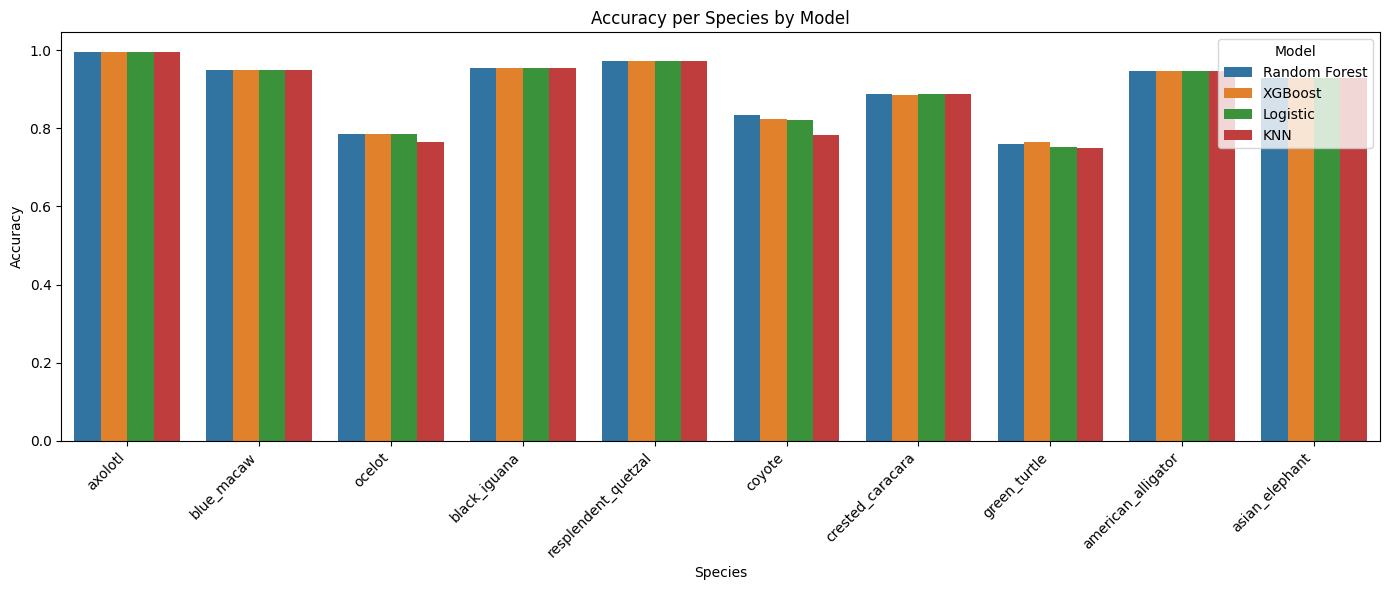

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=all_metrics, x="Species", y="Accuracy", hue="Model", errorbar=None)
plt.title("Accuracy per Species by Model")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
summary = all_metrics.groupby("Model")[["Accuracy", "Precision", "Recall", "F1"]].mean().round(3)
summary = summary.sort_values("F1", ascending=False)
display(summary)

,Accuracy,Precision,Recall,F1
Model,,,,
KNN,0.893,0.205,0.176,0.172
Random Forest,0.901,0.221,0.117,0.132
XGBoost,0.900,0.213,0.117,0.132
Logistic,0.899,0.214,0.113,0.127


# After tuning

## Matrix Comparison

In [ ]:
# Load the exported matrices
rf_metrics_tuned = pd.read_csv("tuned/rf_tuned_metrics.csv", index_col=0)
xgb_metrics_tuned = pd.read_csv("tuned/xgb_tuned_metrics.csv", index_col=0)
logreg_metrics_tuned = pd.read_csv("tuned/logreg_tuned_metrics.csv", index_col=0)
knn_metrics_tuned = pd.read_csv("tuned/knn_tuned_metrics.csv", index_col=0)

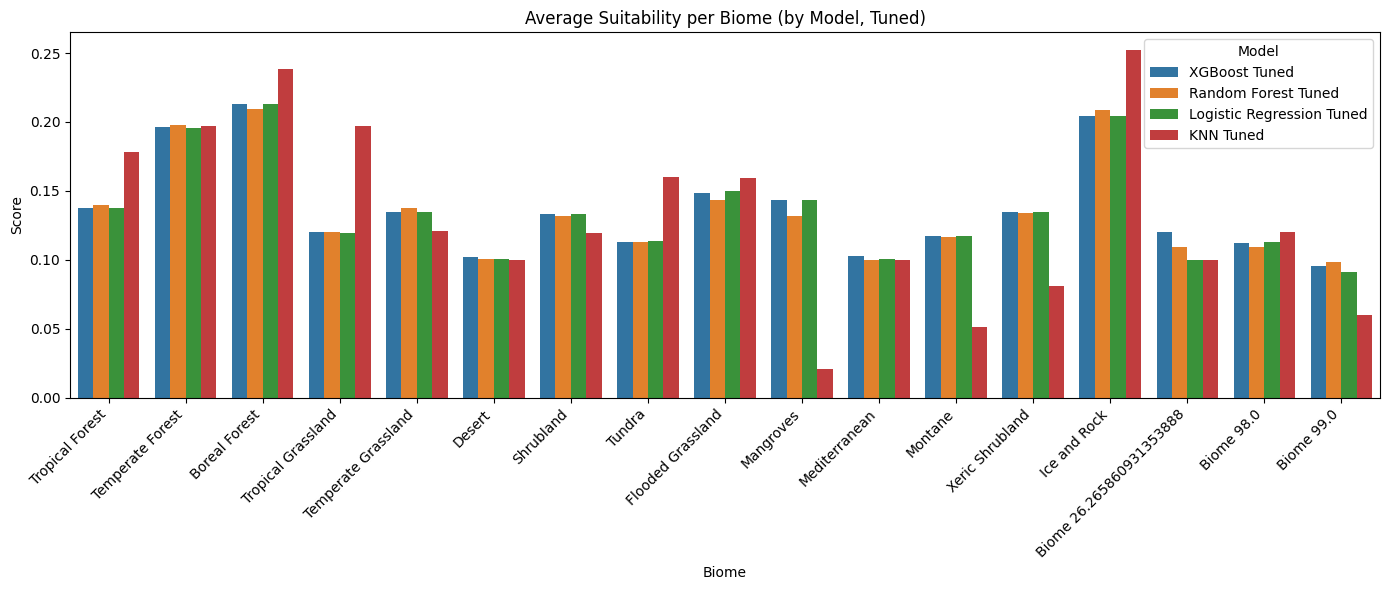

In [ ]:
# Add model labels before stacking
xgb["Model"] = "XGBoost Tuned"
rf["Model"] = "Random Forest Tuned"
logreg["Model"] = "Logistic Regression Tuned"
knn["Model"] = "KNN Tuned"

# Drop 'level_0' if it exists
for df in [xgb, rf, logreg, knn]:
    df.drop(columns=["level_0"], errors="ignore", inplace=True)

# Combine all matrices
all_data = pd.concat([xgb, rf, logreg, knn])

# Melt, keeping 'Model' and biome name intact
melted = all_data.reset_index().melt(id_vars=["index", "Model"], var_name="Biome", value_name="Score")
melted = melted.rename(columns={"index": "Species"})  # Optional but cleaner

# Drop unwanted 'level_0' rows from Biome column
melted = melted[melted["Biome"] != "level_0"]

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x="Biome", y="Score", hue="Model", errorbar=None)
plt.title("Average Suitability per Biome (by Model, Tuned)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Model
KNN Tuned                    0
Logistic Regression Tuned    0
Random Forest Tuned          0
XGBoost Tuned                0
dtype: int64
Model
KNN Tuned                    0.247936
Logistic Regression Tuned    0.237114
Random Forest Tuned          0.237137
XGBoost Tuned                0.236068
dtype: float64


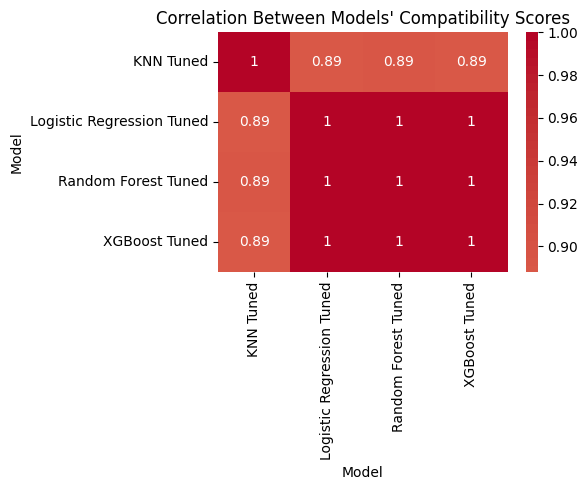

In [ ]:
# Pivot melted data to species-biome-model format
pivoted = melted.pivot_table(index=["Species", "Biome"], columns="Model", values="Score")
correlation = pivoted.dropna().corr()

print(pivoted.isna().sum())

print(pivoted.std())

# Plot correlation between models
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0.5)
plt.title("Correlation Between Models' Compatibility Scores")
plt.tight_layout()
plt.show()

## Metric Comparison

In [ ]:
rf_metrics_tuned = pd.read_csv("tuned/rf_tuned_metrics.csv")
xgb_metrics_tuned = pd.read_csv("tuned/xgb_tuned_metrics.csv")
logreg_metrics_tuned = pd.read_csv("tuned/logreg_tuned_metrics.csv")
knn_metrics_tuned = pd.read_csv("tuned/knn_tuned_metrics.csv")

# Combine
all_metrics_tuned = pd.concat([rf_metrics_tuned, xgb_metrics_tuned,
                               logreg_metrics_tuned, knn_metrics_tuned])
all_metrics_tuned.head()

,Species,Model,Best Params,Accuracy,Precision,Recall,F1
0,axolotl,Random Forest (Tuned),"{'class_weight': 'balanced', 'max_depth': None...",0.647849,0.012563,1.000000,0.024814
1,blue_macaw,Random Forest (Tuned),"{'class_weight': 'balanced', 'max_depth': None...",0.772401,0.163823,0.842105,0.274286
2,ocelot,Random Forest (Tuned),"{'class_weight': 'balanced', 'max_depth': None...",0.724014,0.432540,0.908333,0.586022
3,black_iguana,Random Forest (Tuned),"{'class_weight': 'balanced', 'max_depth': None...",0.846774,0.192893,0.760000,0.307692
4,resplendent_quetzal,Random Forest (Tuned),"{'class_weight': 'balanced', 'max_depth': 10, ...",0.647849,0.071259,0.937500,0.132450


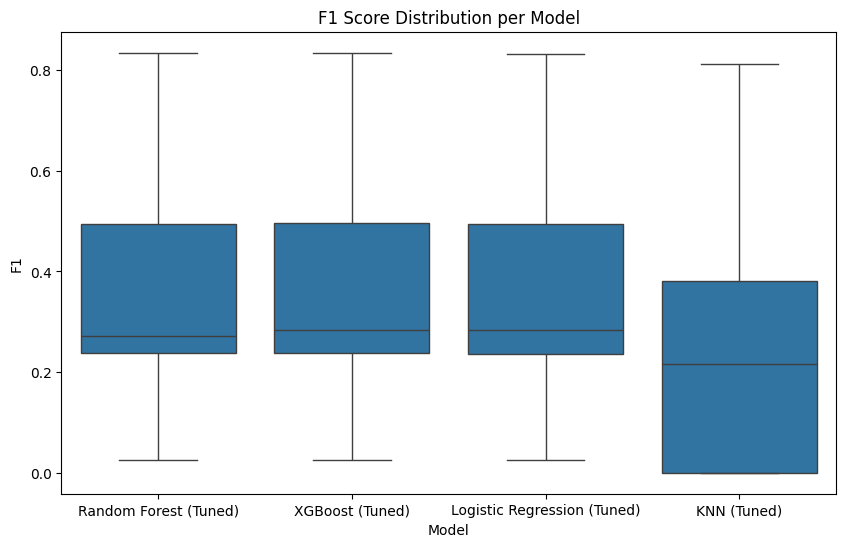

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_metrics_tuned, x="Model", y="F1")
plt.title("F1 Score Distribution per Model")
plt.show()

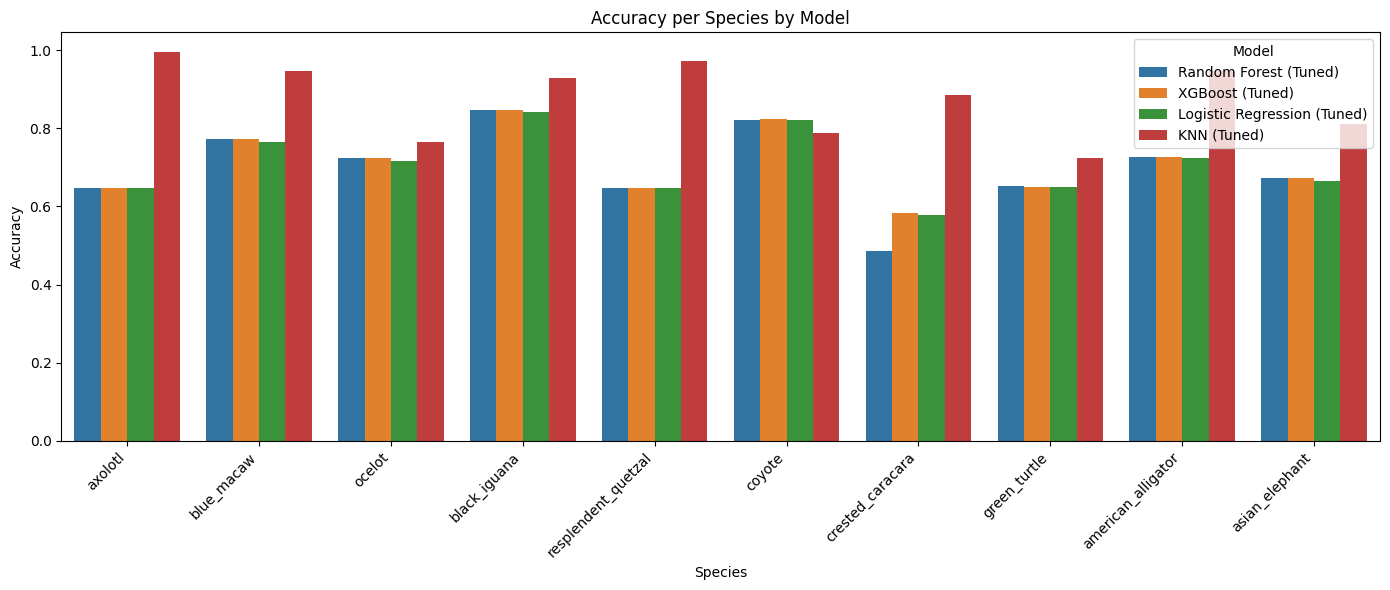

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=all_metrics_tuned, x="Species", y="Accuracy", hue="Model", errorbar=None)
plt.title("Accuracy per Species by Model")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
summary = all_metrics_tuned.groupby("Model")[["Accuracy", "Precision", "Recall", "F1"]].mean().round(3)
summary = summary.sort_values("F1", ascending=False)
display(summary)

,Accuracy,Precision,Recall,F1
Model,,,,
XGBoost (Tuned),0.709,0.261,0.834,0.350
Logistic Regression (Tuned),0.705,0.259,0.840,0.348
Random Forest (Tuned),0.700,0.259,0.838,0.347
KNN (Tuned),0.876,0.262,0.264,0.244
